In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
saude_df = pd.read_csv('/content/BI_saude_dados_simulados.csv')

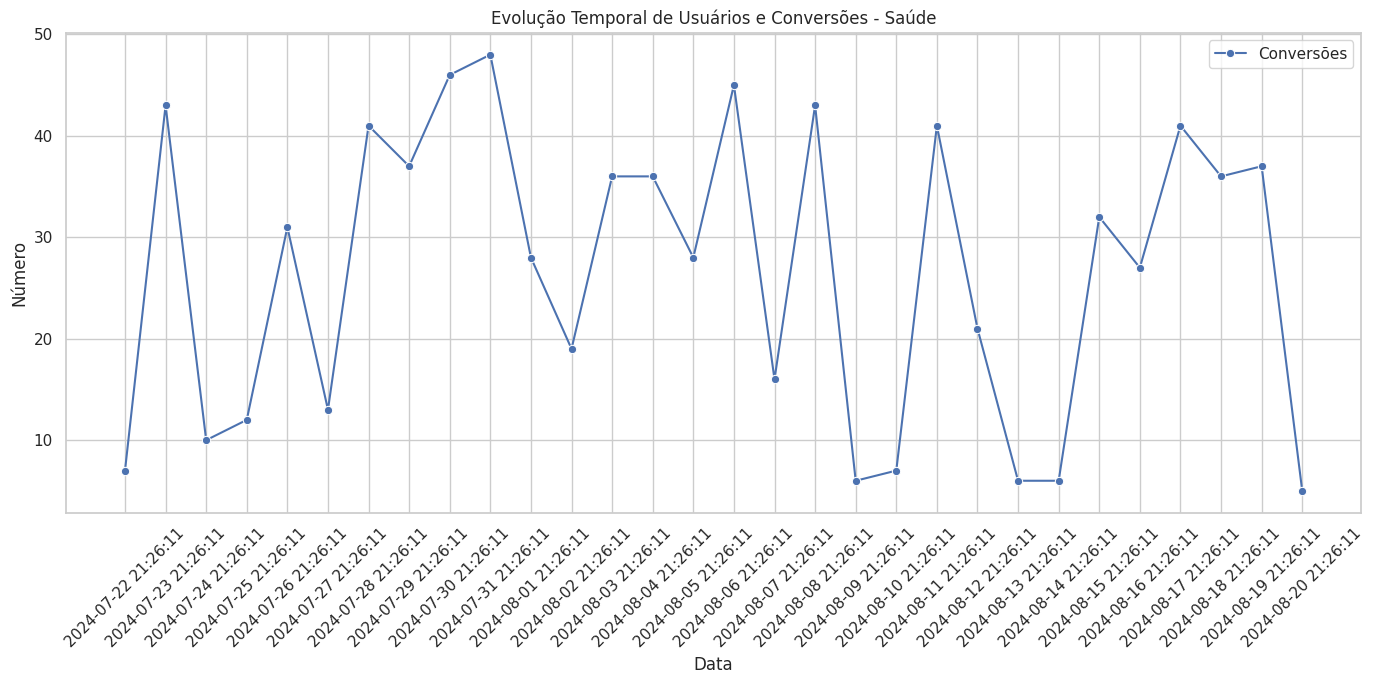

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,7))
sns.lineplot(data=saude_df, x='Data', y='Conversoes',label='Conversões',marker='o')
plt.title('Evolução Temporal de Usuários e Conversões - Saúde')
plt.xlabel('Data')
plt.ylabel('Número')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

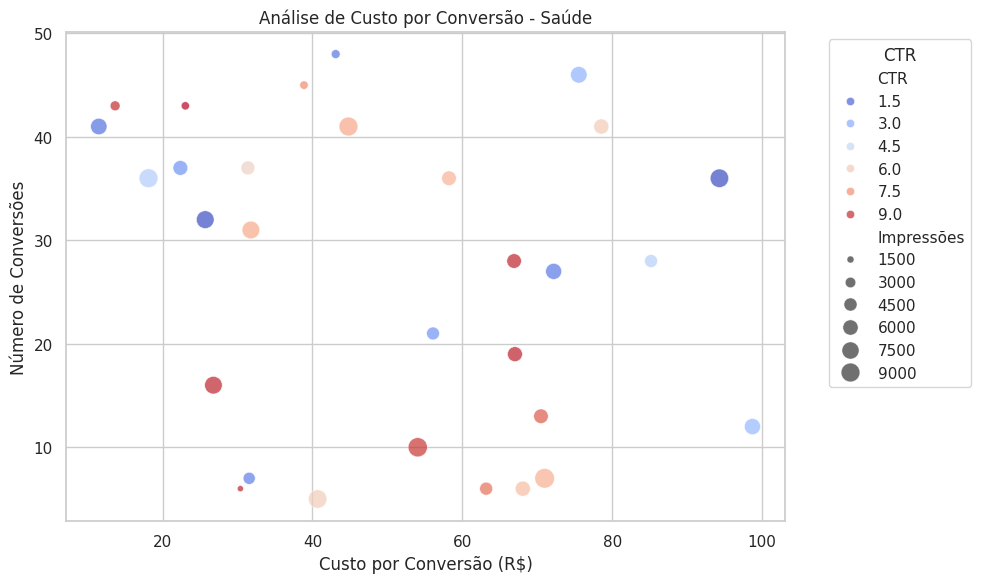

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=saude_df, x='Custo_por_Conversao', y='Conversoes',size='Impressões', hue='CTR', sizes=(20,200),palette='coolwarm',alpha=0.7)
plt.title('Análise de Custo por Conversão - Saúde')
plt.xlabel('Custo por Conversão (R$)')
plt.ylabel('Número de Conversões')
plt.legend(title='CTR', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

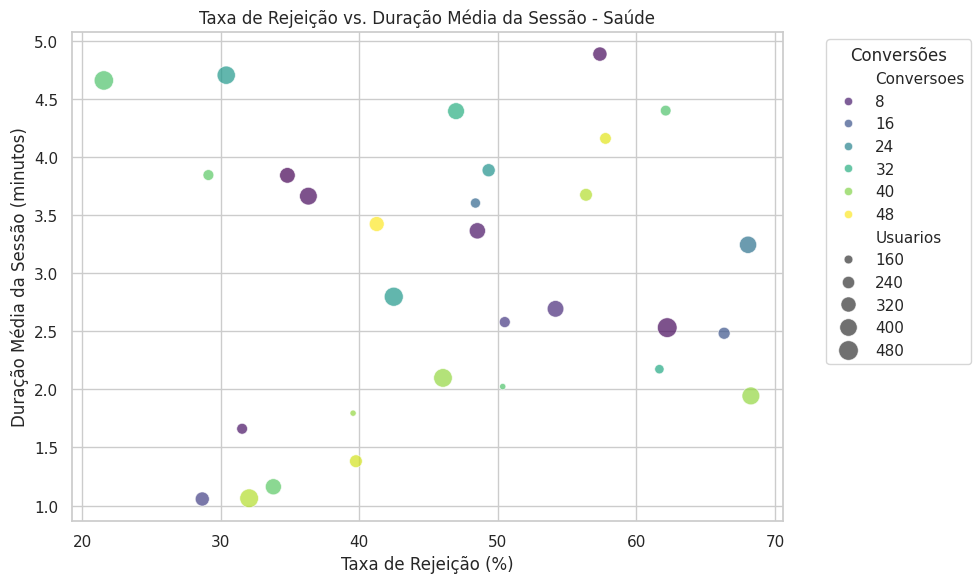

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = saude_df, x='Taxa_Rejeicao',y='Duracao_Media_Sessao', size='Usuarios',hue='Conversoes', sizes=(20,200), palette='viridis',alpha=0.7)
plt.title('Taxa de Rejeição vs. Duração Média da Sessão - Saúde')
plt.xlabel('Taxa de Rejeição (%)')
plt.ylabel('Duração Média da Sessão (minutos)')
plt.legend(title='Conversões', bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# previsão de dados

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

saude_df = pd.read_csv('/content/BI_saude_dados_simulados.csv')

X = saude_df[['Impressões','CTR','Lat','Long']]
y = saude_df['Conversoes']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(mse)

#Parte 2 - Visualização de Previsão

pred_df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
fig = px.scatter(pred_df, x='Real', y='Predito', trendline="ols", title="Previsão de Conversões - Saúde")
fig.show()

245.57647324287174


In [ ]:
pred_df

In [ ]:
import pandas as pd
import numpy as np

# Definindo o número de exemplos na base de dados
num_samples = 1000

# Gerando dados simulados
np.random.seed(42)
investment = np.random.randint(5000, 50000, num_samples)  # Investimento em Publicidade (R$)
visits = np.random.randint(1000, 10000, num_samples)      # Número de Visitas ao Site
conversion_rate = np.random.uniform(0.01, 0.20, num_samples)  # Taxa de Conversão (%)
avg_price = np.random.uniform(50, 300, num_samples)       # Preço Médio do Produto (R$)

# Calculando vendas com base em uma função realista
sales = visits * conversion_rate * avg_price + 0.05 * investment + np.random.normal(0, 2000, num_samples)

# Criando o DataFrame
sales_df = pd.DataFrame({
    'Investimento_Publicidade': investment,
    'Visitas_Site': visits,
    'Taxa_Conversao': conversion_rate,
    'Preco_Medio_Produto': avg_price,
    'Vendas': sales
})

# Salvando em um arquivo CSV
sales_df.to_csv('/content/BI_vendas_dados_simulados.csv', index=False)

# Visualizando os primeiros registros
print(sales_df.head())


   Investimento_Publicidade  Visitas_Site  Taxa_Conversao  \
0                     20795          3898        0.049617   
1                      5860          8546        0.186813   
2                     43158          1077        0.032110   
3                     49732          8577        0.165315   
4                     16284          5227        0.082318   

   Preco_Medio_Produto         Vendas  
0            84.150226   16740.102513  
1           212.909940  340779.372313  
2           234.649365   10181.532974  
3           128.906836  184416.492359  
4           211.208151   90552.841844  


In [ ]:
# previsão de dados

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px


vendas_df = pd.read_csv('/content/BI_vendas_dados_simulados.csv')

X = vendas_df[['Investimento_Publicidade','Visitas_Site','Taxa_Conversao','Preco_Medio_Produto']]
y = vendas_df['Vendas']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

#Avaliação do Modelo

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:")
print(mse)
print("R2:")
print(r2)


#Parte 2 - Visualização de Previsão

pred_df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
fig = px.scatter(pred_df, x='Real', y='Predito', trendline="ols", title="Previsão de Vendas")
fig.show()

MSE:
1459958645.1795444
R2:
0.7942837074963497


In [ ]:
import pandas as pd
import numpy as np

# Semente para reprodutibilidade
np.random.seed(42)

# Definir categorias e temas mais extensos
categorias = ['Ação', 'Drama', 'Comédia', 'Romance', 'Suspense', 'Ficção Científica', 'Fantasia', 'Histórico', 'Terror', 'Documentário']
temas = ['Racismo', 'LGBT', 'Crítica Social', 'Romance', 'Aventura', 'Amizade', 'Guerra', 'Música', 'Biografia', 'Esportes']

# Gerar 1000 filmes/séries com características aleatórias
num_filmes = 1000
num_usuarios = 1000

filmes = pd.DataFrame({
    'filme_id': np.arange(1, num_filmes + 1),
    'titulo': [f'Filme {i}' for i in range(1, num_filmes + 1)],
    **{f'categoria_{categoria.lower()}': np.random.randint(0, 2, num_filmes) for categoria in categorias},
    **{f'tema_{tema.lower().replace(" ", "_")}': np.random.randint(0, 2, num_filmes) for tema in temas}
})

# Função para criar interações realistas
def gerar_interacoes(num_usuarios, num_filmes, interacoes_por_usuario):
    interacoes_usuario = []
    for usuario_id in range(1, num_usuarios + 1):
        filme_ids = np.random.choice(filmes['filme_id'], interacoes_por_usuario, replace=False)
        interacoes = np.random.choice([1, 2, -1], interacoes_por_usuario, replace=True)  # 1 = curtida, 2 = super curtida, -1 = não curtida
        for filme_id, interacao in zip(filme_ids, interacoes):
            interacoes_usuario.append({
                'usuario_id': usuario_id,
                'filme_id': filme_id,
                'interacao': interacao
            })
    return pd.DataFrame(interacoes_usuario)

# Criar interações com base no número de usuários e filmes
interacoes_usuario = gerar_interacoes(num_usuarios, num_filmes, interacoes_por_usuario=50)

# Exibindo algumas linhas das tabelas geradas
print("Dados dos Filmes/Séries:")
print(filmes.head())

print("\nDados de Interações dos Usuários:")
print(interacoes_usuario.head())


Dados dos Filmes/Séries:
   filme_id   titulo  categoria_ação  categoria_drama  categoria_comédia  \
0         1  Filme 1               0                1                  0   
1         2  Filme 2               1                0                  1   
2         3  Filme 3               0                0                  1   
3         4  Filme 4               0                0                  1   
4         5  Filme 5               0                0                  1   

   categoria_romance  categoria_suspense  categoria_ficção científica  \
0                  1                   1                            0   
1                  1                   0                            0   
2                  1                   0                            0   
3                  1                   0                            0   
4                  0                   1                            1   

   categoria_fantasia  categoria_histórico  ...  tema_racismo  tema_lgbt  \
0  

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Função para calcular o perfil do usuário com base nas interações
def calcular_perfil_usuario(usuario_id, interacoes_usuario, filmes):
    dados_usuario = interacoes_usuario[interacoes_usuario['usuario_id'] == usuario_id]
    perfil_usuario = np.dot(dados_usuario['interacao'].values,
                            filmes.loc[filmes['filme_id'].isin(dados_usuario['filme_id']), filmes.columns[2:]])
    perfil_usuario = perfil_usuario / np.linalg.norm(perfil_usuario)
    return perfil_usuario

# Função para recomendar filmes
def recomendar_filmes(usuario_id, interacoes_usuario, filmes, top_n=10):
    perfil_usuario = calcular_perfil_usuario(usuario_id, interacoes_usuario, filmes)
    features_filmes = filmes.iloc[:, 2:].values
    similaridade = cosine_similarity([perfil_usuario], features_filmes)

    recomendacoes = pd.DataFrame({
        'filme_id': filmes['filme_id'],
        'titulo': filmes['titulo'],
        'score_similaridade': similaridade.flatten()
    })

    assistidos = interacoes_usuario[interacoes_usuario['usuario_id'] == usuario_id]['filme_id'].values
    recomendacoes = recomendacoes[~recomendacoes['filme_id'].isin(assistidos)]
    recomendacoes = recomendacoes.sort_values(by='score_similaridade', ascending=False)

    return recomendacoes.head(top_n)

# Exemplo de recomendação para um usuário específico
usuario_id = 1
recomendacoes = recomendar_filmes(usuario_id, interacoes_usuario, filmes, top_n=10)
print(f"\nTop 10 Recomendações para o Usuário {usuario_id}:")
print(recomendacoes)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Função para calcular recomendação com base no histórico do usuário
def recomendar_filmes(usuario_id, interacoes_usuario,filmes, num_recomendacoes=5):
  interacoes_usuario_especifico = interacoes_usuario[interacoes_usuario['usuario_id'] == usuario_id]
  filmes_assistidos = interacoes_usuario_especifico['filme_id'].values
  filmes_curtidos = interacoes_usuario_especifico[interacoes_usuario_especifico['interacao'] > 0]['filme_id'].values
  caracteristicas_filme_curtidos = filmes[filmes['filme_id'].isin(filmes_curtidos)].iloc[:,2:].values

  perfil_usuario = np.mean(caracteristicas_filme_curtidos, axis=0).reshape(1,-1)
  filmes_nao_assistidos = filmes[~filmes['filme_id'].isin(filmes_assistidos)]
  similaridades = cosine_similarity(perfil_usuario, filmes_nao_assistidos.iloc[:,2:].values).flatten()

  indices_recomendados = np.argsort(similaridades)[-num_recomendacoes:][::1]
  filmes_recomendados = filmes_nao_assistidos.iloc[indices_recomendados]

  return filmes_recomendados, filmes_curtidos, perfil_usuario

  categorias = ['Ação', 'Drama', 'Comédia', 'Romance', 'Suspense', 'Ficção Científica', 'Fantasia', 'Histórico', 'Terror', 'Documentário']
  temas = ['Racismo', 'LGBT', 'Crítica Social', 'Romance', 'Aventura', 'Amizade', 'Guerra', 'Música', 'Biografia', 'Esportes']

  num_filmes = 1000
  num_usuarios = 100

  filmes = pd.DataFrame({
      'filme_id': np.arrange(1, num_filmes + 1),
      'titulo': [f'Filme {i}' for i in range(1,num_filmes + 1)],
      **{f'categoria_{categoria.lower()}': np.random.randint(0,2,num_filmes) for categoria in categorias},
      **{f'tema_{tema.lower().replace(" ", "_")}': np.random.randint(0,2,num_filmes) for tema in temas}
  })

def gerar_interacoes(num_usuarios, num_filmes, interacoes_por_usuario):
  interacoes_usuario = []
  for usuario_id in range(1, num_usuarios + 1):
    filme_ids = np.random.choice(filmes['filme_id'], interacoes_por_usuario, replace=False)
    interacoes = np.random.choice([1,2,-1], interacoes_por_usuario, replace=True)
    for filme_id, interacao in zip(filme_ids, interacoes):
      interacoes_usuario.append({
          'usuario_id': usuario_id,
          'filme_id': filme_id,
          'interacao': interacao
      })
  return pd.DataFrame(interacoes_usuario)

interacoes_usuario = gerar_interacoes(num_usuarios=num_usuarios, num_filmes=num_filmes, interacoes_por_usuario = 50)

# iniciar interação com usuário

usuario_id_input = int(input("Digite o ID do usuário para qual deseja fazer recomendações (1 a 100)"))

filmes_recomendados,filmes_curtidos,perfil_usuario = recomendar_filmes(usuario_id_input,interacoes_usuario,filmes)

print(f"Filmes Curtidos Pelo Usuário {usuario_id_input}:")
print(filmes_recomendados[['titulo']])

print("\n Características dos Filmes Recomendados (em comparação com filmes curtidos):")
for index, row in filmes_recomendados.iterrows():
  print(f"\nFilme: {row['titulo']}")
  for categoria in categorias:
    if row[f'categoria_{categoria.lower()}'] == 1:
      print(f"Categoria: {categoria}")
    for tema in temas:
      if row[f'tema_{tema.lower().replace(" ", "_")}'] == 1:
        print(f"Tema: {tema}")

print("\n Comparação Percentual das Características dos FIlmes recomendados vs. Curtidos")

for idx, row in filmes_recomendados.iterrows():
  caracteristicas_filme = row.iloc[2:].values
  percent_match = (np.dot(perfil_usuario.flatten(),caracteristicas_filme) / np.sum(perfil_usuario.flatten())) * 100
  print(f"Filme: {row['titulo']} - {percent_match:2f} % de Similaridades com filmes curtidos")














Digite o ID do usuário para qual deseja fazer recomendações (1 a 100)12
Filmes Curtidos Pelo Usuário 12:
        titulo
989  Filme 990
971  Filme 972
816  Filme 817
492  Filme 493
545  Filme 546

 Características dos Filmes Recomendados (em comparação com filmes curtidos):

Filme: Filme 990
Categoria: Ação
Tema: Racismo
Tema: LGBT
Tema: Crítica Social
Tema: Romance
Tema: Aventura
Tema: Música
Tema: Biografia
Tema: Esportes
Categoria: Drama
Tema: Racismo
Tema: LGBT
Tema: Crítica Social
Tema: Romance
Tema: Aventura
Tema: Música
Tema: Biografia
Tema: Esportes
Tema: Racismo
Tema: LGBT
Tema: Crítica Social
Tema: Romance
Tema: Aventura
Tema: Música
Tema: Biografia
Tema: Esportes
Categoria: Romance
Tema: Racismo
Tema: LGBT
Tema: Crítica Social
Tema: Romance
Tema: Aventura
Tema: Música
Tema: Biografia
Tema: Esportes
Categoria: Suspense
Tema: Racismo
Tema: LGBT
Tema: Crítica Social
Tema: Romance
Tema: Aventura
Tema: Música
Tema: Biografia
Tema: Esportes
Categoria: Ficção Científica
Tema: Racism